## Wykrywanie anomalii w rzeczywistych zbiorach 

    Zadanie wyjaśnimy na podstawie zbioru danych SMTP - zawierającego anomalie (ataki) SMTP.
    
    Ten zbiór i inne rzeczywiste zbiory danych do wykorzystania w I części laboratorium pobieramy z: 
    http://odds.cs.stonybrook.edu/
    

### SMTP dataset

http://odds.cs.stonybrook.edu/smtp-kddcup99-dataset/

Smtp (KDDCUP99)	\
points:      95156	\
dimenstions: 3	\
outliers:     30 (0.03%)

Zbiór zawiera wybrane (zagregowane) cechy połączeń TCP, spośród których 30 (oznaczone jako outliers) to próby ataku, pozostałe - normalny ruch (inliers).

Zadanie polega na zbadaniu skuteczności różnych metod wykrywania anomalii do detekcji tych ataków.  


In [10]:
!pip install h5py

In [11]:
import numpy as np 
import h5py
f = h5py.File('./data/smtp.mat','r')
print(f.keys())


<KeysViewHDF5 ['X', 'y']>


In [12]:
X = np.array(f.get('X')).T
y = np.array(f.get('y')).ravel().astype(int)

In [13]:
# X zawiera obserwacje (wiersze) - cechy połączeń
# y - ocznaczenie połączeń jako ruch normalny (inlier) lub atak (outlier)
print(X)
print(X.shape)
print(y)
print(y.shape)  # 0 - inlier, 1 - outlier


[[ 0.09531018  7.09597607  5.79636166]
 [ 0.09531018  7.42601321  5.80844275]
 [-2.30258509  6.88663378  5.79939564]
 ...
 [-2.30258509  6.73471056  5.79939564]
 [ 0.09531018  6.91879413  5.80844275]
 [ 0.09531018  6.60272357  5.80242044]]
(95156, 3)
[0 0 0 ... 0 0 0]
(95156,)


### LOF 

In [5]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=35, novelty=False, contamination='auto') 
# model = LocalOutlierFactor(n_neighbors=35, novelty=False, contamination=0.001) 

y_pred = model.fit_predict(X)  # 1 - inlier, -1 - outlier

In [6]:
y_pred[y_pred==1] = 0    # inliers
y_pred[y_pred==-1] = 1   # outliers

In [7]:
print(np.array(np.unique(y, return_counts=True)))

print(np.array(np.unique(y_pred, return_counts=True)))

[[    0     1]
 [95126    30]]
[[    0     1]
 [92539  2617]]


In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[92530,  2596],
       [    9,    21]])

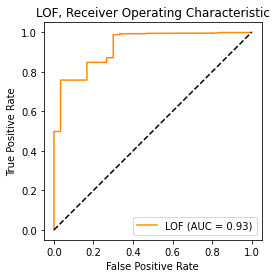

In [9]:
### plot ROC curve

import math
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

model.fit(X)
y_pred = model.negative_outlier_factor_


RocCurveDisplay.from_predictions(
    y,
    y_pred,
    name="LOF",
    color="darkorange",
    pos_label=0
)
plt.plot([0, 1], [0, 1], "k--")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LOF, Receiver Operating Characteristic")
plt.legend()
plt.show()
